In [46]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [47]:
def graph_json(filename):
    with open(filename) as json_file:
        json_data = json.load(json_file)
        name = json_data['ObjectName']
        seed = json_data['Seed']
        vertex_count = json_data['VertexCount']
        deformed_deviation = json_data['DeformedAngularDeviation']
        deformation_method = json_data['DeformationMethod']
        vertex_selection_method = json_data['VertexSelectionMethod']
        offsets = np.array(json_data['Offsets'], dtype='float')
        vertices = np.array(json_data['Vertices'], dtype='int')
        skipped_iterations = np.array(json_data['SkippedIterations'], dtype='bool')
        ideal_normal_angles_from_ray = np.array(json_data['IdealNormalAnglesFromRay'], dtype='float')
        iterations = vertices.size
        deviations = np.array(json_data['Deviations'], dtype='float').reshape((iterations, offsets.size))

        min_deviation = np.min(deviations[-1])
        max_deviation = np.max(deviations)
        min_offset = np.round(np.min(offsets), 2)
        max_offset = np.round(np.max(offsets), 2)
        effective_iterations = iterations - np.sum(skipped_iterations)

        deviation_diff_percent = (min_deviation-deformed_deviation)/deformed_deviation * 100

        info = f"Plot of total angular deviation (0; {np.round(max_deviation,2)}) per offset ({min_offset}; {max_offset})\n"
        info += f"Object: {name}\n"
        info += f"Vertices: {vertex_count} (if more vertices then expected, that is because of UV mapping)\n"
        info += f"Deformation method: {deformation_method}"
        if (deformation_method == "Random"):
            info += f" (seed {seed})"
        info += f"\n"
        info += f"Vertex selection method: {vertex_selection_method}\n"
        info += f"{iterations} iterations plotted ltr-ttb. {effective_iterations} iterations ({np.round(effective_iterations/iterations*100, 2)}%) reduced the minimum\n"
        info += f"Total angular deviation reduced from {np.round(deformed_deviation, 2)} to {np.round(min_deviation, 2)} ({np.round(deviation_diff_percent, 2)}%)\n"
        info += f"\nLEGEND\n"
        info += f"-------------\n"
        info += f"v: Current iteration's vertex\n"
        info += f"ndfr: ideal normal's degrees from ray -- used to see orthogonality of current iteration's vertex normal relative to viewpoint\n"
        print(info)

        xplots = 10
        yplots = math.ceil(iterations/xplots)
        fig, axs = plt.subplots(yplots, xplots, figsize=(12, yplots*1.5))

        for y in range(yplots):
            for x in range(xplots):
                iter = y*xplots + x
                if iter < iterations:
                    color = 'red' if skipped_iterations[iter] else 'blue'
                    axs[y,x].plot(offsets, deviations[iter], c=color)
                    vertex = vertices[iter]
                    title = f"v: {vertex}"
                    title += f"\nndfr: {np.round(ideal_normal_angles_from_ray[vertex],1)}"
                    axs[y,x].set_title(title)

                axs[y,x].set_ylim(0, max_deviation)
                axs[y,x].set_xticklabels([])
                axs[y,x].set_yticklabels([])
        
        fig.tight_layout()
        fig.show()

Plot of total angular deviation (0; 1327.14) per offset (-10.0; 9.9)
Object: Tetrahedron
Vertices: 12 (if more vertices then expected, that is because of UV mapping)
Deformation method: Random (seed 0)
Vertex selection method: Maximum local angular deviation, skipping if no decrease in total deviation
49 iterations plotted ltr-ttb. 7 iterations (14.29%) reduced the minimum
Total angular deviation reduced from 96.37 to 10.5 (-89.1%)

LEGEND
-------------
v: Current iteration's vertex
ndfr: ideal normal's degrees from ray -- used to see orthogonality of current iteration's vertex relative to viewpoint



/var/folders/ht/fjyngybj4s19bb50tv72p70h0000gn/T/ipykernel_7474/2520358025.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


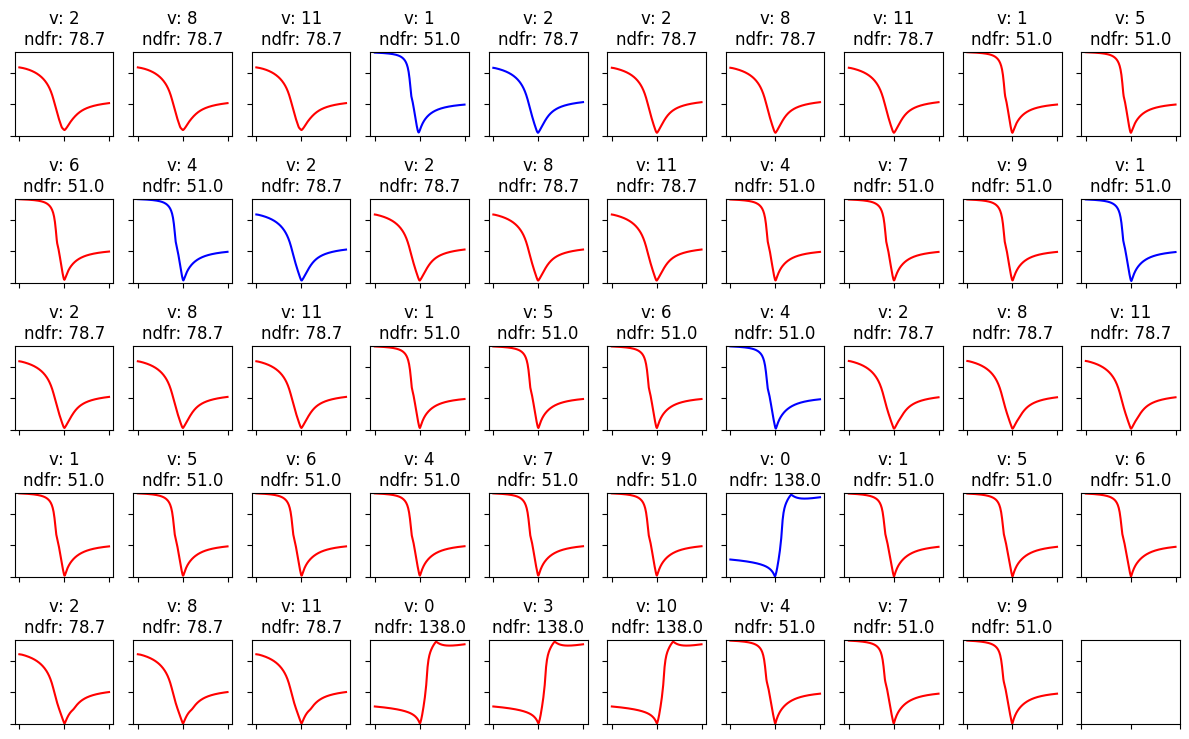

In [48]:
graph_json("Tetrahedron.json")

Plot of total angular deviation (0; 1362.98) per offset (-10.0; 9.9)
Object: Cube
Vertices: 24 (if more vertices then expected, that is because of UV mapping)
Deformation method: Random (seed 0)
Vertex selection method: Maximum local angular deviation, skipping if no decrease in total deviation
60 iterations plotted ltr-ttb. 12 iterations (20.0%) reduced the minimum
Total angular deviation reduced from 123.66 to 13.24 (-89.29%)

LEGEND
-------------
v: Current iteration's vertex
ndfr: ideal normal's degrees from ray -- used to see orthogonality of current iteration's vertex relative to viewpoint



/var/folders/ht/fjyngybj4s19bb50tv72p70h0000gn/T/ipykernel_7474/2520358025.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


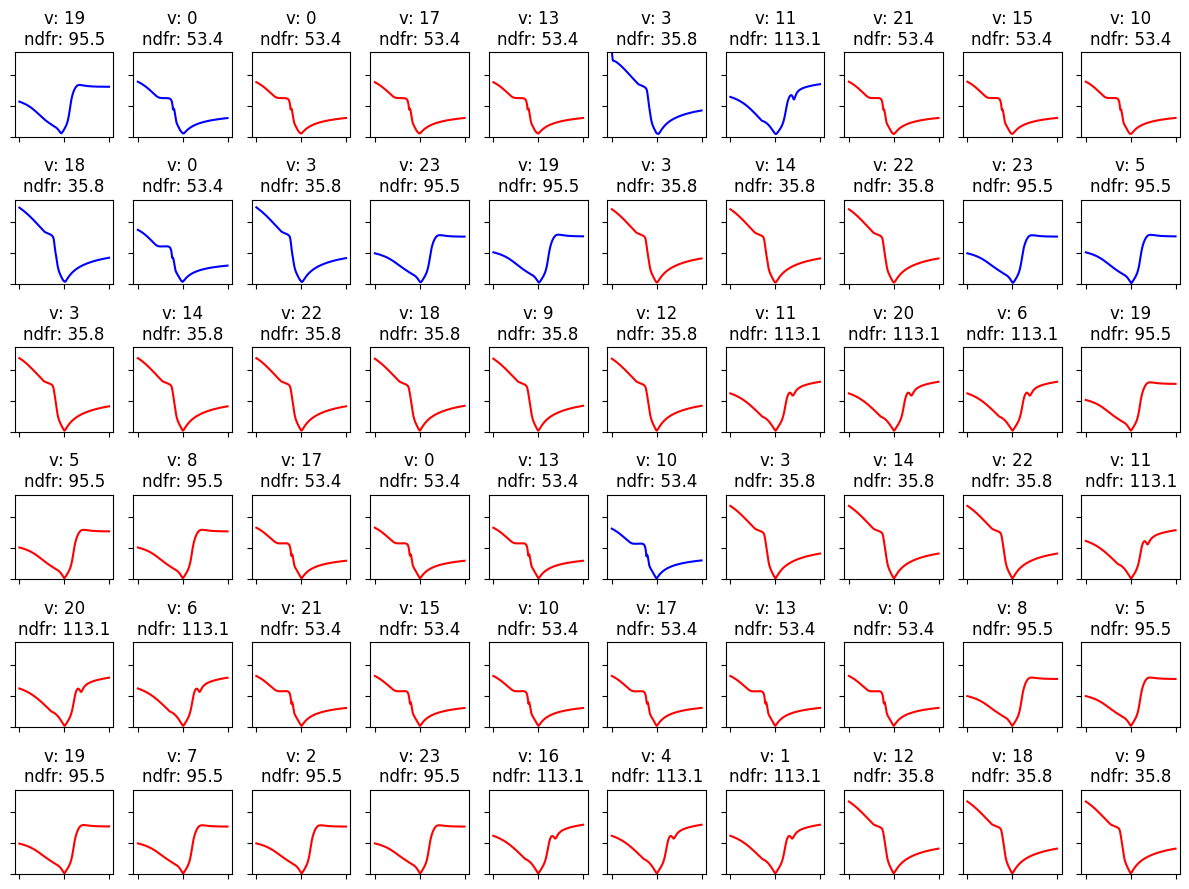

In [49]:
graph_json("Cube.json")

Plot of total angular deviation (0; 2397.98) per offset (-10.0; 9.9)
Object: Icosahedron
Vertices: 60 (if more vertices then expected, that is because of UV mapping)
Deformation method: Random (seed 0)
Vertex selection method: Maximum local angular deviation, skipping if no decrease in total deviation
515 iterations plotted ltr-ttb. 25 iterations (4.85%) reduced the minimum
Total angular deviation reduced from 733.05 to 222.47 (-69.65%)

LEGEND
-------------
v: Current iteration's vertex
ndfr: ideal normal's degrees from ray -- used to see orthogonality of current iteration's vertex relative to viewpoint



/var/folders/ht/fjyngybj4s19bb50tv72p70h0000gn/T/ipykernel_7474/2520358025.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


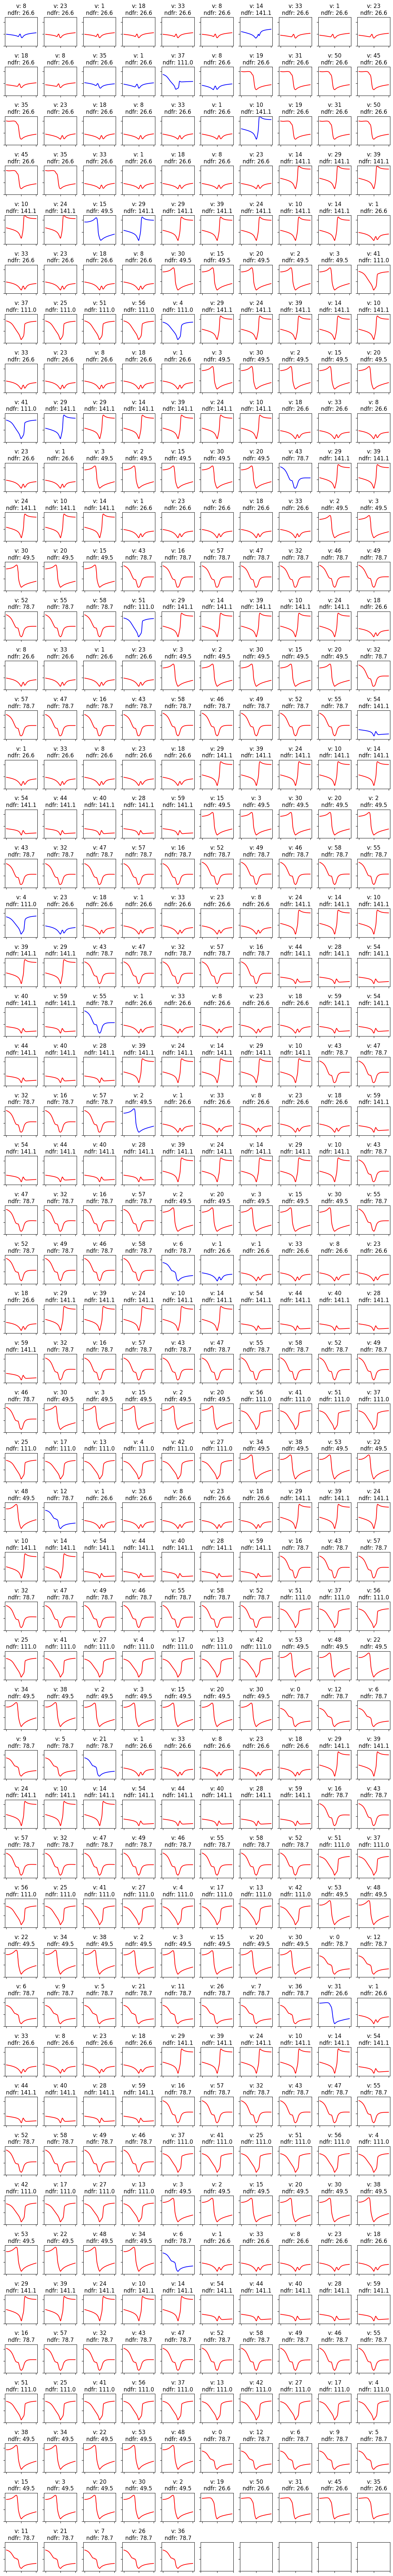

In [50]:
graph_json("Icosahedron.json")